In [1]:
from google.colab import files
uploaded = files.upload()

Saving labeled_data.csv to labeled_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = str(text).lower()  # Case folding
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    tokens = text.split()
    stop_words = set(stopwords.words('english'))  # Jika dataset Bahasa Indonesia, ubah ke 'indonesian'
    tokens = [w for w in tokens if w not in stop_words]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(w) for w in tokens]
    return " ".join(tokens)

df['clean_text'] = df['tweet'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['class']  # pastikan kolom label bernama 'class' atau 'label'

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  54  208   28]
 [  38 3690  104]
 [   2  136  697]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.19      0.28       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.83      0.84       835

    accuracy                           0.90      4957
   macro avg       0.78      0.66      0.69      4957
weighted avg       0.88      0.90      0.88      4957


Accuracy: 0.8959047811176114


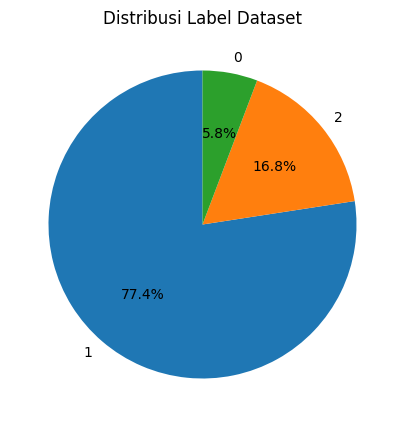

In [10]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(class_counts.values,
        labels=class_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribusi Label Dataset')
plt.show()

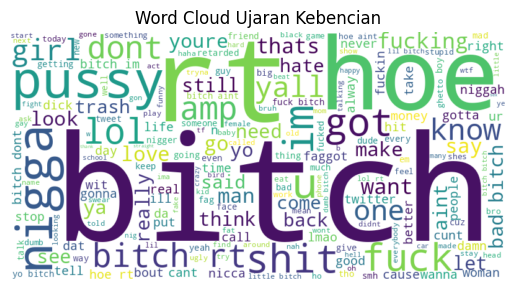

In [8]:
from wordcloud import WordCloud

hate_text = " ".join(df[df['class']==1]['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(hate_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ujaran Kebencian')
plt.show()

In [9]:
stop_words = set(stopwords.words('indonesian'))